In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [23]:
data = pd.read_csv('Iris.csv')

In [24]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Only using 2 variables

Drop `SepalLengthCm` and `SepalWidthCm` cols

In [26]:
DROP_COLS = ["Id", "SepalLengthCm", "SepalWidthCm"]

In [27]:
def drop_columns(cols_name):
    data.drop(cols_name, axis=1, inplace=True)

In [28]:
drop_columns(DROP_COLS)

In [29]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [30]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Only Pick Versicolor

Nanti sisa nya akan di convert jadi Non-Versicolor

In [31]:
data["Species"][data["Species"] != "Iris-versicolor"] = "Non-versicolor"

/tmp/ipykernel_243/2584635057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Species"][data["Species"] != "Iris-versicolor"] = "Non-versicolor"


In [32]:
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Non-versicolor
1,1.4,0.2,Non-versicolor
2,1.3,0.2,Non-versicolor
3,1.5,0.2,Non-versicolor
4,1.4,0.2,Non-versicolor
...,...,...,...
145,5.2,2.3,Non-versicolor
146,5.0,1.9,Non-versicolor
147,5.2,2.0,Non-versicolor
148,5.4,2.3,Non-versicolor


In [33]:
data["Species"].value_counts()

Non-versicolor     100
Iris-versicolor     50
Name: Species, dtype: int64

### Create Visualization

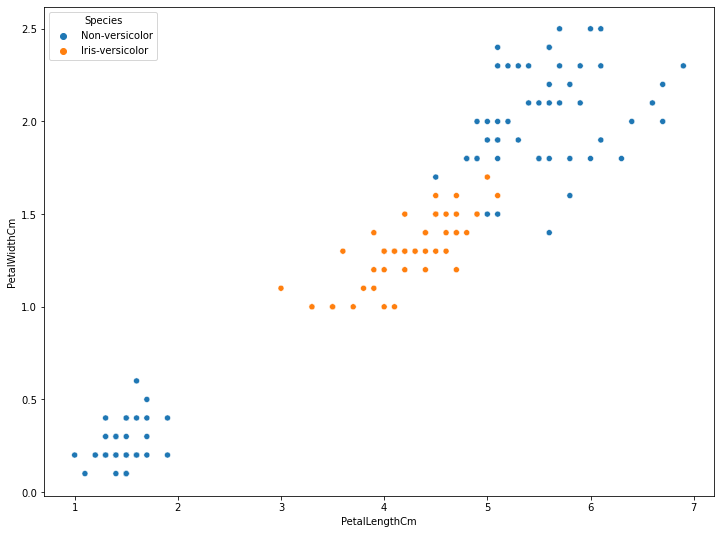

In [34]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

### Split Input Output 

In [35]:
def split_input_output(data, output_col):
    X = data.drop(columns=output_col)
    y = data[output_col]
    
    return X, y

In [36]:
X, y = split_input_output(data=data,
                          output_col="Species")

In [37]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [38]:
X.shape

(150, 2)

In [39]:
y.head()

0    Non-versicolor
1    Non-versicolor
2    Non-versicolor
3    Non-versicolor
4    Non-versicolor
Name: Species, dtype: object

In [40]:
y.shape

(150,)

In [41]:
y.value_counts()

Non-versicolor     100
Iris-versicolor     50
Name: Species, dtype: int64

### Train Test Split 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [44]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [45]:
y_train.value_counts()

Non-versicolor     80
Iris-versicolor    40
Name: Species, dtype: int64

In [46]:
y_test.value_counts()

Non-versicolor     20
Iris-versicolor    10
Name: Species, dtype: int64

### Preprocessing

In [47]:
y_train.value_counts()

Non-versicolor     80
Iris-versicolor    40
Name: Species, dtype: int64

In [48]:
def convert_class(y_train, y_test, class_name):
    y_train = y_train.apply(lambda x: 1 if x == class_name else 0)
    y_test = y_test.apply(lambda x: 1 if x == class_name else 0)
    
    return y_train, y_test

In [49]:
y_train, y_test = convert_class(y_train=y_train,
                                y_test=y_test,
                                class_name="Iris-versicolor")

In [50]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [51]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [52]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

Coba bandingkan model yang pake di Scaling dan tanpa di Scaling

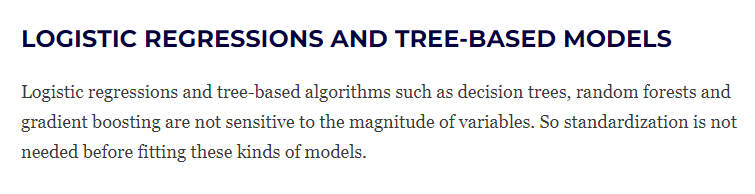

Setelah melakukan eksperimen menggunakan scaling dan tidak menggunakan scaling didapatkan hasil:
- Secara overall, bentuk dari Decision Boundary nya masih sama, cuma beda scale atau range data nya aja
- Apakah karena range data nya tidak begitu jauh sehingga tidak begitu berpengaruh
- Tetapi menariknya adalah hasil metrics accuracy tanpa di scaling jauh lebih bagus daripada yang menggunakan scaling 

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [54]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns, index = X_train.index)

In [56]:
X_train_scaled

,PetalLengthCm,PetalWidthCm
58,0.467126,0.134871
144,1.088705,1.713850
119,0.693155,0.398034
81,-0.041439,-0.259874
69,0.071576,-0.128292
...,...,...
132,1.032198,1.319105
53,0.128083,0.134871
122,1.653777,1.055942
143,1.201720,1.450687


In [57]:
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns, index = X_test.index)

In [58]:
X_test_scaled

,PetalLengthCm,PetalWidthCm
34,-1.284597,-1.444108
103,1.032198,0.792779
109,1.314734,1.713850
92,0.128083,0.003290
1,-1.341104,-1.312526
3,-1.284597,-1.312526
146,0.693155,0.924360
88,0.184590,0.134871
120,1.088705,1.450687
7,-1.284597,-1.312526


### Modelling with Logistic Regression 

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logreg = LogisticRegression()

In [61]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [62]:
y_pred_train_proba = logreg.predict_proba(X_train_scaled)

Fungsi logistic di kasus ini cuma nge prediksi / nge hitung kelas 1 aja. Karena untuk dapetin kelas 0 tinggal 1 - proba_kelas_1

In [63]:
y_pred_train_proba

array([[0.55130447, 0.44869553],
       [0.73337882, 0.26662118],
       [0.5411022 , 0.4588978 ],
       [0.62495983, 0.37504017],
       [0.62012368, 0.37987632],
       [0.66638492, 0.33361508],
       [0.79957284, 0.20042716],
       [0.80907875, 0.19092125],
       [0.80587935, 0.19412065],
       [0.61949467, 0.38050533],
       [0.71387252, 0.28612748],
       [0.77595174, 0.22404826],
       [0.64753483, 0.35246517],
       [0.74654127, 0.25345873],
       [0.62945993, 0.37054007],
       [0.7862785 , 0.2137215 ],
       [0.55639001, 0.44360999],
       [0.62464695, 0.37535305],
       [0.72140168, 0.27859832],
       [0.66149507, 0.33850493],
       [0.74654127, 0.25345873],
       [0.54620819, 0.45379181],
       [0.66209252, 0.33790748],
       [0.73494171, 0.26505829],
       [0.42980091, 0.57019909],
       [0.83285727, 0.16714273],
       [0.78971665, 0.21028335],
       [0.7951695 , 0.2048305 ],
       [0.77595174, 0.22404826],
       [0.79625426, 0.20374574],
       [0.

In [64]:
y_pred_train = logreg.predict(X_train_scaled)

In [65]:
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [67]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.5916666666666667

Precision Recall, dll pelajari lagi

In [68]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        80
           1       0.09      0.03      0.04        40

    accuracy                           0.59       120
   macro avg       0.37      0.45      0.39       120
weighted avg       0.46      0.59      0.51       120



In [69]:
y_pred_test_proba = logreg.predict_proba(X_test_scaled)

In [70]:
y_pred_test_proba

array([[0.73494171, 0.26505829],
       [0.52573662, 0.47426338],
       [0.66549418, 0.33450582],
       [0.63424733, 0.36575267],
       [0.77595174, 0.22404826],
       [0.76155784, 0.23844216],
       [0.67488697, 0.32511303],
       [0.64814382, 0.35185618],
       [0.67459406, 0.32540594],
       [0.76155784, 0.23844216],
       [0.69732926, 0.30267074],
       [0.734161  , 0.265839  ],
       [0.64814382, 0.35185618],
       [0.77595174, 0.22404826],
       [0.83832823, 0.16167177],
       [0.63870042, 0.36129958],
       [0.66149507, 0.33850493],
       [0.63870042, 0.36129958],
       [0.66579122, 0.33420878],
       [0.6793864 , 0.3206136 ],
       [0.78279959, 0.21720041],
       [0.57059101, 0.42940899],
       [0.66209252, 0.33790748],
       [0.56113511, 0.43886489],
       [0.45995795, 0.54004205],
       [0.74654127, 0.25345873],
       [0.77117796, 0.22882204],
       [0.77595174, 0.22404826],
       [0.52093554, 0.47906446],
       [0.80285075, 0.19714925]])

In [71]:
y_pred_test = logreg.predict(X_test_scaled)

In [72]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [73]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.6333333333333333

In [74]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.00      0.00      0.00        10

    accuracy                           0.63        30
   macro avg       0.33      0.47      0.39        30
weighted avg       0.44      0.63      0.52        30



### Get Coefficient and Intercept

In [75]:
logreg.coef_

array([[ 1.43325954, -1.07460291]])

In [76]:
logreg.intercept_

array([-0.73052285])

In [77]:
print('intercept ', logreg.intercept_[0])
print('classes', logreg.classes_)
pd.DataFrame({'coeff': logreg.coef_[0]}, 
             index=X.columns)

intercept  -0.7305228464554575
classes [0 1]


,coeff
PetalLengthCm,1.433260
PetalWidthCm,-1.074603


In [78]:
coef_1, coef_2 = logreg.coef_[0]

In [79]:
itc = logreg.intercept_[0]

In [80]:
m_boundary = -coef_1 / coef_2

In [81]:
m_boundary

1.3337573572072732

In [82]:
c_boundary = -itc / coef_2

In [83]:
c_boundary

-0.6798072475007869

In [84]:
print(m_boundary, c_boundary)

1.3337573572072732 -0.6798072475007869


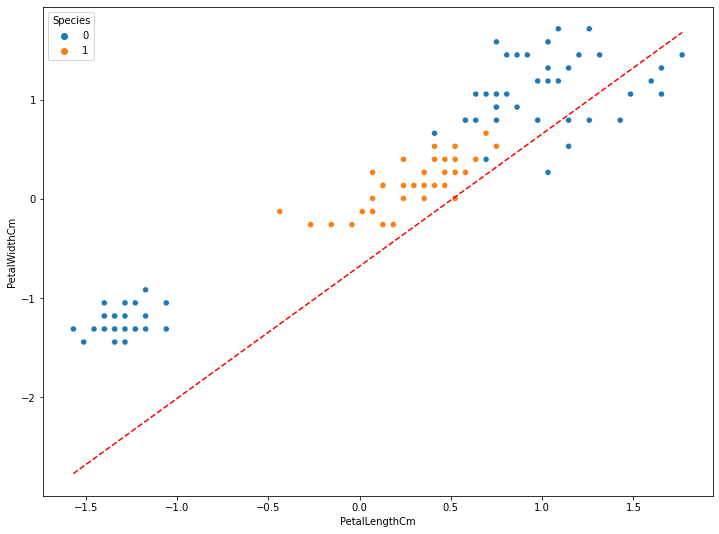

In [85]:
plt.figure(figsize=(12, 9))

data_scaled = X_train_scaled.copy()
data_scaled["Species"] = y_train

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

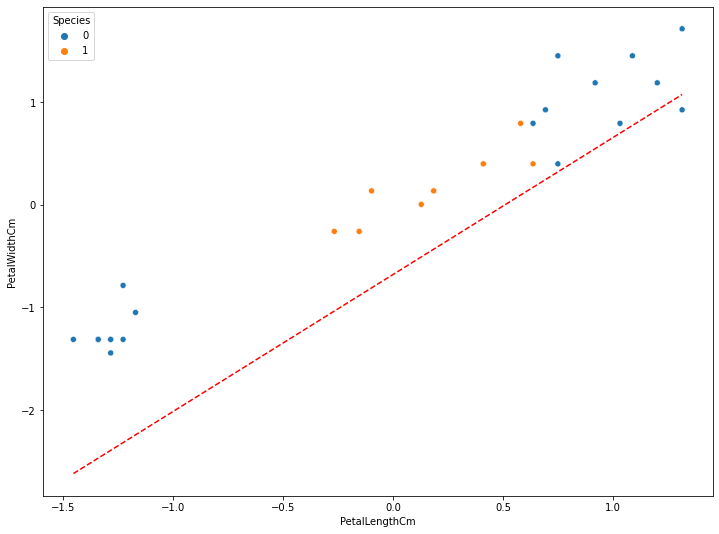

In [86]:
plt.figure(figsize=(12, 9))

data_scaled = X_test_scaled.copy()
data_scaled["Species"] = y_test

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

### Without Scaling

In [87]:
X, y = split_input_output(data=data,
                          output_col="Species")

### Train Test Split 

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [90]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [91]:
y_train.value_counts()

Non-versicolor     80
Iris-versicolor    40
Name: Species, dtype: int64

In [92]:
y_test.value_counts()

Non-versicolor     20
Iris-versicolor    10
Name: Species, dtype: int64

### Preprocessing

In [93]:
y_train, y_test = convert_class(y_train=y_train,
                                y_test=y_test,
                                class_name="Iris-versicolor")

In [94]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [95]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

### Modeling 

In [96]:
logreg2 = LogisticRegression()

In [97]:
logreg2.fit(X_train, y_train)

LogisticRegression()

In [98]:
y_pred_train_proba = logreg2.predict_proba(X_train)

In [99]:
y_pred_train_proba

array([[0.54538602, 0.45461398],
       [0.73017444, 0.26982556],
       [0.53323132, 0.46676868],
       [0.62501585, 0.37498415],
       [0.61926541, 0.38073459],
       [0.66662737, 0.33337263],
       [0.8097696 , 0.1902304 ],
       [0.81894353, 0.18105647],
       [0.81528811, 0.18471189],
       [0.6132621 , 0.3867379 ],
       [0.71585056, 0.28414944],
       [0.78628353, 0.21371647],
       [0.64162634, 0.35837366],
       [0.75627395, 0.24372605],
       [0.62777001, 0.37222999],
       [0.79630518, 0.20369482],
       [0.55144406, 0.44855594],
       [0.62203626, 0.37796374],
       [0.71805121, 0.28194879],
       [0.65831975, 0.34168025],
       [0.75627395, 0.24372605],
       [0.53931452, 0.46068548],
       [0.66400684, 0.33599316],
       [0.7449137 , 0.2550863 ],
       [0.41234826, 0.58765174],
       [0.84284024, 0.15715976],
       [0.80024422, 0.19975578],
       [0.79585499, 0.20414501],
       [0.78628353, 0.21371647],
       [0.80597285, 0.19402715],
       [0.

In [100]:
y_pred_train = logreg2.predict(X_train)

In [101]:
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [103]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.5916666666666667

In [104]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74        80
           1       0.09      0.03      0.04        40

    accuracy                           0.59       120
   macro avg       0.37      0.45      0.39       120
weighted avg       0.46      0.59      0.51       120



In [105]:
y_pred_test_proba = logreg2.predict_proba(X_test)

In [106]:
y_pred_test_proba

array([[0.7449137 , 0.2550863 ],
       [0.51492958, 0.48507042],
       [0.6581118 , 0.3418882 ],
       [0.63346803, 0.36653197],
       [0.78628353, 0.21371647],
       [0.77162559, 0.22837441],
       [0.67183754, 0.32816246],
       [0.64744248, 0.35255752],
       [0.66903299, 0.33096701],
       [0.77162559, 0.22837441],
       [0.70088381, 0.29911619],
       [0.73761074, 0.26238926],
       [0.64744248, 0.35255752],
       [0.78628353, 0.21371647],
       [0.84757996, 0.15242004],
       [0.63619625, 0.36380375],
       [0.65831975, 0.34168025],
       [0.63619625, 0.36380375],
       [0.660962  , 0.339038  ],
       [0.67720785, 0.32279215],
       [0.79230862, 0.20769138],
       [0.56016043, 0.43983957],
       [0.66400684, 0.33599316],
       [0.5543533 , 0.4456467 ],
       [0.44517424, 0.55482576],
       [0.75627395, 0.24372605],
       [0.77113653, 0.22886347],
       [0.78628353, 0.21371647],
       [0.51198954, 0.48801046],
       [0.81350924, 0.18649076]])

In [107]:
y_pred_test = logreg2.predict(X_test)

In [108]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0])

In [109]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.6333333333333333

In [110]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78        20
           1       0.00      0.00      0.00        10

    accuracy                           0.63        30
   macro avg       0.33      0.47      0.39        30
weighted avg       0.44      0.63      0.52        30



### Get Coefficient and Intercept

In [111]:
logreg2.coef_

array([[ 0.85154194, -1.45846562]])

In [112]:
logreg2.intercept_

array([-2.20313281])

In [113]:
print('intercept ', logreg2.intercept_[0])
print('classes', logreg2.classes_)
pd.DataFrame({'coeff': logreg2.coef_[0]}, 
             index=X.columns)

intercept  -2.2031328077766346
classes [0 1]


,coeff
PetalLengthCm,0.851542
PetalWidthCm,-1.458466


In [114]:
coef_1, coef_2 = logreg2.coef_[0]

In [115]:
itc = logreg2.intercept_[0]

In [116]:
m_boundary = -coef_1 / coef_2

In [117]:
m_boundary

0.5838615110373471

In [118]:
c_boundary = -itc / coef_2

In [119]:
c_boundary

-1.5105826170358465

In [120]:
print(m_boundary, c_boundary)

0.5838615110373471 -1.5105826170358465


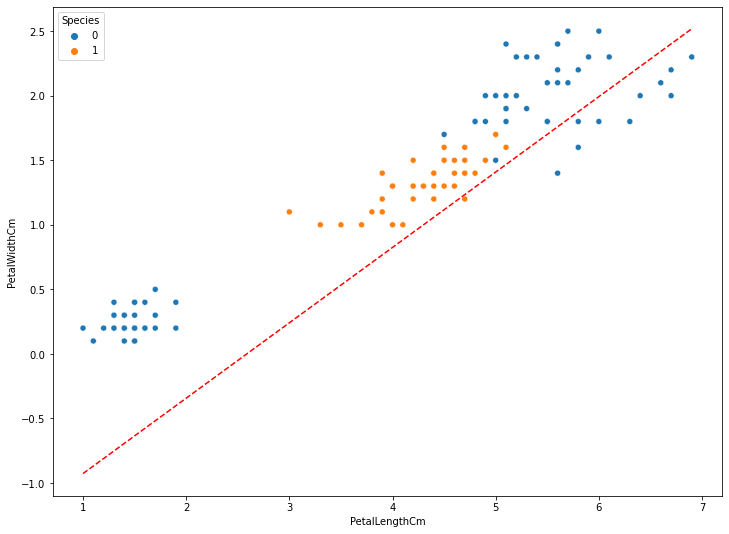

In [121]:
plt.figure(figsize=(12, 9))

data_scaled = X_train.copy()
data_scaled["Species"] = y_train

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

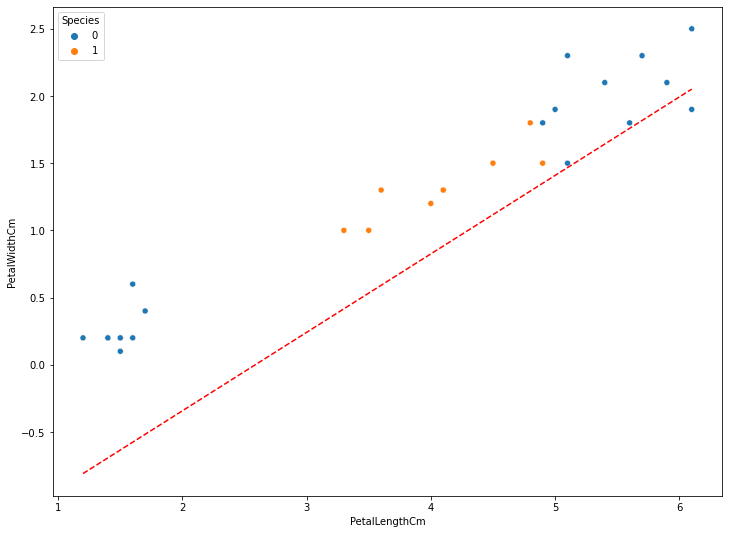

In [122]:
plt.figure(figsize=(12, 9))

data_scaled = X_test.copy()
data_scaled["Species"] = y_test

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()